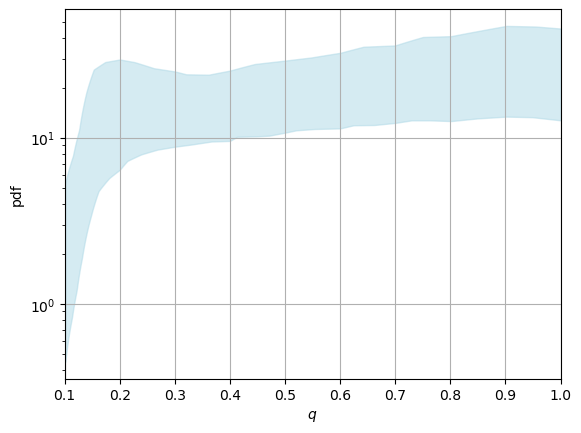

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON files
with open("5percent_jacob.json", "r") as f5, open("95percent_jacob.json", "r") as f95:
    data5 = json.load(f5)
    data95 = json.load(f95)

# Convert to arrays and sort both by x (just to be safe)
x5 = np.array([float(d["x"]) for d in data5])
y5 = np.array([float(d["y"]) for d in data5])
ind = np.argsort(x5)
x5 = x5[ind]
y5 = y5[ind]
x95 = np.array([float(d["x"]) for d in data95])
y95 = np.array([float(d["y"]) for d in data95])
ind = np.argsort(x95)
x95 = x95[ind]
y95 = y95[ind]

# Combine both datasets, interpolate to common x-grid for fill_between
x_common = np.linspace(min(x5.min(), x95.min()), max(x5.max(), x95.max()), 1000)
y5_interp = np.interp(x_common, x5, y5)
y95_interp = np.interp(x_common, x95, y95)

plt.fill_between(x_common, y5_interp, y95_interp, color='lightblue', alpha=0.5)

# Labels and formatting
plt.xlabel(r"$q$")
plt.ylabel("pdf")
plt.yscale('log')
plt.grid(True)
plt.xlim(0.1,1)

import h5py
with h5py.File('../m1m2_cut/data/jacob_data.h5','w') as f:
    f.create_dataset('q', data=x_common)
    f.create_dataset('Rq5', data=y5_interp)
    f.create_dataset('Rq95', data=y95_interp)
f.close()